<figure>
   <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=125 ALIGN="right">
</figure>
    
# GIS visualisation

In this notebook we will work together to make an application that combines the data from an xml, a csv and a shapfile into one graphical map.

<br>
<br>
<div style="text-align: right"> developed by MAMBA </div>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd
import seaborn as sns
import xml.etree.ElementTree as ET
#install package containing shapefile with the Anaconda prompt 'conda install pyshp'
import shapefile

### Constants and relative paths to files

In [4]:
# read shapefile with the actual location of the canals
boezem = r"shapefiles\boezemwatergangen.shp"

# read shapefile with the modelled canals
RTCtakken = r"shapefiles\RTC takken voorstel 20160203.shp"

# read csv file with initial water levels
csv_file = 'timeseries_0000.csv'
 
# read an xml file with the model configuration (node coördinates and their names)
xml_file = 'rtcToolsConfig.xml'
ns = "{http://www.wldelft.nl/fews}" #standard code, created by the software 


ref_system_xml = 'EPSG:28992'
ref_basemap = 3857

### Read the x,y and node-names from the xml file

In [5]:
tree = ET.parse(xml_file)

x = []
y = []
names = []
for elem in tree.iter(ns + 'node'):
    #print(elem.attrib['x'])
    x.append(float(elem.attrib['x']))
    y.append(float(elem.attrib['y']))
    names.append(elem.attrib['id'])
    
dfxy = pd.DataFrame(data = {'x': x, 
                           'y': y,
                            'names': names})

dfxy = dfxy.set_index('names')
dfxy

,x,y
names,,
N1,71538.62,441142.57
N4,70545.79,448791.50
N5,70590.09,448741.04
N7,71573.05,441316.86
N8,71606.43,441355.23
N9,72093.82,447542.30
N11,73629.17,443161.90
N12,74396.33,448609.53
N16,75555.68,440017.85


### Link the water levels from the csv to the DataFrame


In [6]:
df_wl = pd.read_csv('timeseries_0000.csv')
df_wl.head()

dfxy['w_level'] = None

for col in df_wl.columns:
    if '_HRTC' in col:
        waarde = df_wl.loc[0, col]
        point_name = col.split('_')[0]
        dfxy.loc[point_name, 'w_level'] = waarde



### Read and transform into GeoDataFrames

In [32]:
# Read from shapefile directly into geodataframe
gdf_boezem = gpd.read_file(boezem)
# set the cordinate reference system that corresponds 
# to that of Openstreet maps (used by contextily)
gdf_boezem = gdf_boezem.to_crs(epsg=ref_basemap)

# create POINTS from the x, y columns of our DataFrame
coords = gpd.points_from_xy(dfxy['x'], dfxy['y'])
# Create the geodataframe based on those points.
gdf = gpd.GeoDataFrame(dfxy, geometry=coords, crs='EPSG:28992')
gdf = gdf.to_crs(epsg= ref_basemap)

### Create the plot

C:\Users\Petra Izeboud\virtual_environments\mamba\lib\site-packages\geopandas\plotting.py:802: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


<AxesSubplot: >

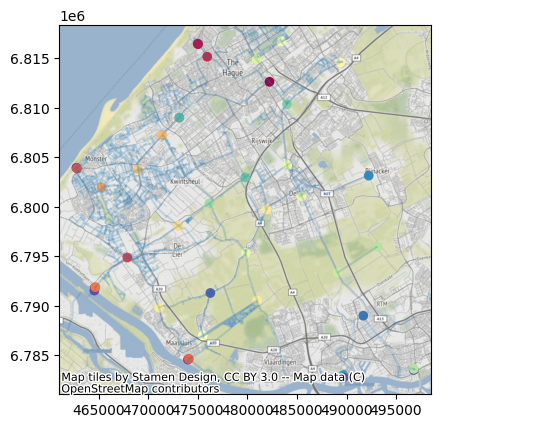

In [30]:
fig, ax = plt.subplots(1)

gdf.plot(ax=ax, column = 'w_level', cmap='Spectral')
ctx.add_basemap(ax =ax)

gdf_boezem.plot(ax =ax, alpha = 0.2)


#### Or, an interactive map!

In [13]:
gdf_no_x_y = gdf[['w_level', 'geometry']]

gdf_no_x_y.to_crs(epsg= ref_basemap)
gdf_no_x_y.explore()
